In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
results_df = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/best_run_beis_comparison/demand_none-carbon_none-datetime_2019-10-19_12-50-23-capacity_52152.csv')
results_df

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,333280.44,213792.17,23300.555309,29579.745224,3.154551e+03,165604.866874,10742.750,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.395805e+10,accepted_price day segment_demand segme...,1190.114792
1,1,295927.74,134146.74,23464.752699,29595.668288,3.122286e+03,165604.866874,2020.510,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.076975e+10,accepted_price day segment_demand segme...,915.259751
2,2,329835.90,221140.75,21601.843042,29224.130128,1.658946e+03,165604.866874,8594.200,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.972210e+10,accepted_price day segment_demand segme...,1193.404506
3,3,373186.74,202562.32,23278.203832,29656.706700,3.188160e+03,165604.866874,13192.970,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,30.8,3.805205e+10,accepted_price day segment_demand segme...,1251.134682
4,4,117794.88,162254.15,22125.504788,29595.668288,3.116345e+03,149146.397926,0.000,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,30.8,2.562410e+10,accepted_price day segment_demand segme...,602.931112
5,5,370097.16,209657.31,23464.752699,29595.668288,3.122286e+03,165604.866874,12386.415,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,30.8,4.215157e+10,accepted_price day segment_demand segme...,1259.057274
6,6,155157.36,143554.85,24587.126216,33942.370241,4.477684e+03,135875.246237,0.000,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,30.8,2.382477e+10,accepted_price day segment_demand segme...,635.297446
7,7,168224.58,161264.28,31262.008003,38306.247757,7.414638e+03,145729.835602,0.000,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,30.8,-8.528614e+08,accepted_price day segment_demand segme...,711.412136
8,8,328338.72,224996.25,23020.557437,29579.745224,3.154551e+03,165604.866874,5470.800,0,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,30.9,-3.333248e+10,accepted_price day segment_demand segme...,1191.656504
9,9,246955.98,184363.21,23182.781702,29595.668288,3.122286e+03,165604.866874,1173.700,0,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,30.9,-3.461687e+10,accepted_price day segment_demand segme...,918.693208


In [18]:
def get_mix(df):
    df['actual_perc'] = df['value_actual'] / df['value_actual'].sum()
    df['simulated_perc'] = df['value_predicted'] / df['value_predicted'].sum()
    return df


def get_projection_difference_sum(results_df, year_to_compare=None):
    ROOT_DIR = '/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run'
    
    contributed_results = results_df.filter(regex='contributed_')  # .tail(MARKET_TIME_SPLICES)
    contributed_results *= 1 / 24

    # best_mix_year = contributed_results.apply(get_year)
    best_mix_year = contributed_results.copy()
    # best_mix_year['year'] = np.repeat(list(range(YEARS_TO_RUN)), 8)
    best_mix_year['year'] = np.repeat(list(range(int(len(best_mix_year.index)/8))), 8)
    # print("contributed_results: {}".format(contributed_results))
    best_mix_year = best_mix_year.rename(columns={'contributed_PV': "contributed_solar"})
    cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])
    # contributed_results['cluster_size'] = [22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0]
    # print("best_mix_year: {}".format(best_mix_year))
    results_wa = best_mix_year.groupby('year').apply(
        lambda x: np.average(x, weights=cluster_size.values, axis=0)).to_frame()
    # print("results_wa: {}".format(results_wa))
    results_wa_split = pd.DataFrame(results_wa)
    # print(results_wa.values)
    results_wa_split[
        ['ccgt', "coal", 'onshore', 'offshore', 'solar', 'nuclear', 'recip_gas', 'biomass', 'year']] = pd.DataFrame(
        results_wa[0].values.tolist(), index=results_wa.index)
    results_wa_split
    # print("results_wa_split: {}".format(results_wa_split))
    # results_wa.index = results_wa.index.str.split("_").str[1].str.lower()
    # print("results_wa: {}".format(results_wa))
    # offshore = results_wa.loc["offshore"].iloc[0]
    # onshore = results_wa.loc["onshore"].iloc[0]
    results_wa_split['wind'] = results_wa_split['offshore'] + results_wa_split['onshore']
    results_wa_split['Natural_gas'] = results_wa_split['ccgt'] + results_wa_split['recip_gas']
    results_wa_split['Renewables'] = results_wa_split['biomass'] + results_wa_split['wind'] + results_wa_split['solar']
    results_wa_split = results_wa_split.drop(['offshore', 'onshore', 'ccgt', 'recip_gas', 'biomass', 'wind', 'solar'],
                                             axis=1)
    results_wa_split = results_wa_split.drop([0, 'year'], axis=1)
    results_wa_long = pd.melt(results_wa_split.reset_index(), id_vars="year")
    results_wa_long['year'] += 2018
    # print("results_wa_long: {}".format(results_wa_long))

    if year_to_compare is not None:
        # results_wa_long = results_wa_long[results_wa_long.year == year_to_compare+1]
        results_wa_long = results_wa_long[results_wa_long.year == year_to_compare]

    results_wa_long = results_wa_long.rename(columns={'variable': "fuel_type"})
    results_wa_long = results_wa_long.set_index(['year', 'fuel_type'])
    # results_wa = results_wa.append(pd.DataFrame({"wind", offshore+onshore}))
    # results_wa.loc['wind'] = [offshore+onshore]
    # print("results_wa: {}".format(results_wa))
    beis_forecast = pd.read_csv('{}/../run/beis_case_study/data/reference_run/2018-2035-beis.csv'.format(ROOT_DIR))
    # electricity_mix = pd.read_csv("{}/data/processed/electricity_mix/energy_mix_historical.csv".format(ROOT_DIR))
    beis_forecast['fuel_type'] = beis_forecast['fuel_type'].replace(
        {"Coal": 'coal', 'Natural gas': 'Natural_gas', "Nuclear": "nuclear"})
    beis_2035_long = pd.melt(beis_forecast, id_vars='fuel_type')
    # print("beis_2035_long: {}".format(beis_2035_long))
    beis_2035_long.variable = pd.to_numeric(beis_2035_long.variable)
    # beis_2035_long = beis_2035_long[beis_2035_long.variable <= 2020]
    beis_2035_long = beis_2035_long.rename(columns={"variable": "year"})
    # print("beis_2035_long_1 : {}".format(beis_2035_long))
    beis_2035_long = beis_2035_long.set_index(["year", 'fuel_type'])
    # print("beis_2035_long: {}".format(beis_2035_long))
    # print("results_wa_long: {}".format(results_wa_long))
    joined = beis_2035_long.join(results_wa_long, how='inner', lsuffix="_actual", rsuffix="_predicted")
    # print("joined: \n{}".format(joined))
    joined = joined.rename(columns={'value': 'actual', 0: 'simulated'})
    # joined = joined.reset_index()
    # joined = joined.loc[~joined.index.str.contains('biomass')]
    # print("joined: \n{}".format(joined))
    joined = joined.groupby("year").apply(get_mix)
    return joined

In [19]:
per_year_dat = get_projection_difference_sum(results_df)
per_year_dat.head()

,,value_actual,value_predicted,actual_perc,simulated_perc
year,fuel_type,,,,
2029,nuclear,72,4214.222079,0.222910,0.047623
2023,coal,0,4780.027962,0.000000,0.066307
2031,nuclear,69,4202.546767,0.218354,0.045500
2022,Natural_gas,73,7019.349596,0.257951,0.123036
2027,Natural_gas,78,24653.817808,0.256579,0.279902


In [21]:
per_year_long = per_year_dat.drop(['value_actual', 'value_predicted'], axis=1).reset_index().melt(['year','fuel_type'])
per_year_long.head()

,year,fuel_type,variable,value
0,2029,nuclear,actual_perc,0.222910
1,2023,coal,actual_perc,0.000000
2,2031,nuclear,actual_perc,0.218354
3,2022,Natural_gas,actual_perc,0.257951
4,2027,Natural_gas,actual_perc,0.256579


(2020, 2032)

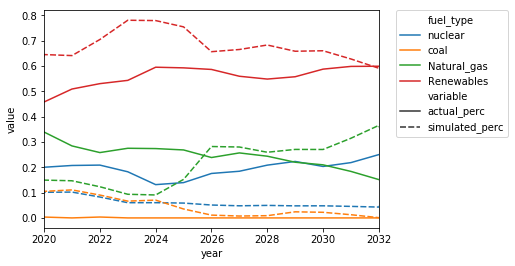

In [25]:
sns.lineplot(data=per_year_long, x='year', hue='fuel_type', style='variable', y='value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([2020,2032])